# AIM 5001 Project 2

## I. Introduction

In this project, the data of Taiwan Taipei City Real Estate Transaction Records till 2020 will be used for the following research. Four numeric data and two categorical data will be applied to explore which district had the highest average premised (land + building), with or without parking space, real estate unit price in Taipei city during the year 2019 and the average monthly unit price changes in this district. The result could reflect the real estates price situation, and provide buying suggestions for regular residential purpose real estates seekers in Taipei.

## II. Data Summary

The dataset of Taiwan Taipei City Real Estate Transaction Records was acquired from Kaggle (https://www.kaggle.com/chrischien17/taiwan-taipei-city-real-estate-transaction-records), originally from Taiwan Open Data Platform. The original data source is https://plvr.land.moi.gov.tw/DownloadOpenData.

* The dataset and relative libraries will be imported below. The dataset will be converted to dataframe with name taipei_df.

In [1]:
#import relative libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the csv file
taipei = "https://raw.githubusercontent.com/chenkecoco1/AIM-5001/38ecc347bb0f5a64c4b69144495501900227da96/taipei_city_real_estate_transaction_v2.csv"
taipei_df = pd.read_csv(taipei)

#test if file loaded successfully
taipei_df.head()


,district,transaction_type,land_shift_area,urban_land_use,main_use,main_building_material,complete_year,building_shift_total_area,num_room,num_hall,...,unit_ntd,carpark_category,carpark_shift_area,carpark_ntd,transaction_year,transaction_month,building_age,number_of_land,number_of_building,number_of_carpark
0,Zhongzheng District,Land,4.00,Quotient,See other registration items,Not Applicable,0.0000,0.00,0,0,...,400000.000000,Not Applicable,0.0,0,2019,10,2019.0000,1,0,0
1,Wenshan District,Premises (land + building),40.75,Address,See other registration items,Reinforced concrete construction,62.0625,109.36,4,0,...,108357.717630,Not Applicable,0.0,0,2019,10,1956.9375,1,1,0
2,Wenshan District,Premises (land + building),33.81,Address,Resident,Reinforced concrete construction,69.0000,109.42,3,2,...,91390.970572,Not Applicable,0.0,0,2019,10,1950.0000,2,1,0
3,Wenshan District,Premises (land + building) + parking space,32.19,Address,Resident,Reinforced concrete construction,84.0000,163.53,3,2,...,128416.804256,Ramp plane,0.0,0,2019,4,1935.0000,1,1,1
4,Wenshan District,Premises (land + building),60.25,Address,See other registration items,Reinforced concrete construction,108.0000,204.79,3,2,...,328157.624884,Not Applicable,0.0,0,2019,10,1911.0000,1,1,0


* Use .dtypes to examine the statistical summary of each attributes of the dataset.

In [2]:
# apply dtypes on the dataframe
taipei_df.dtypes

district                      object
transaction_type              object
land_shift_area              float64
urban_land_use                object
main_use                      object
main_building_material        object
complete_year                float64
building_shift_total_area    float64
num_room                       int64
num_hall                       int64
num_toilet                     int64
num_partition                 object
management_org                object
total_ntd                    float64
unit_ntd                     float64
carpark_category              object
carpark_shift_area           float64
carpark_ntd                    int64
transaction_year               int64
transaction_month              int64
building_age                 float64
number_of_land                 int64
number_of_building             int64
number_of_carpark              int64
dtype: object

* Use .shape to investigate the number of rows and columns of the dataset.

In [3]:
# apply .shape on the dataframe
taipei_df.shape

(5910, 24)

* Missing values need to be checked to determine if any actions need to be taken before analysis.

In [4]:
# apply .isnull.sum() on the dataframe to check the missing values
taipei_df.isnull().sum()

district                     0
transaction_type             0
land_shift_area              0
urban_land_use               0
main_use                     0
main_building_material       0
complete_year                0
building_shift_total_area    0
num_room                     0
num_hall                     0
num_toilet                   0
num_partition                0
management_org               0
total_ntd                    0
unit_ntd                     0
carpark_category             0
carpark_shift_area           0
carpark_ntd                  0
transaction_year             0
transaction_month            0
building_age                 0
number_of_land               0
number_of_building           0
number_of_carpark            0
dtype: int64

According to the results above, the dataset has 5910 observations and 24 attributes. The attributes data types can be classified as 3 types.
* The attributes with the following column names are nominal categorical data as the data type is object: district, transaction_type, urban_land_use, main_use, main_building_material, num_partition, management_org, carpark_category.
* The attributes with the following column names are numeric data as the data type is float: land_shift_area, building_shift_total_area, total_ntd, unit_ntd, carpark_shift_area, complete_year, building_age.
* The attributes with the following column names are ordinal categorical data as the data type is integer: num_room, num_hall, num_toilet, carpark_ntd, transaction_year, transaction_month, number_of_land, number_of_building, number_of_carpark

There were no missing values found.

# III. Exploratory Data Analysis (EDA)

Based on the question:
* *Which district had the highest average premised (land + building), with or without parking space, real estate unit price in Taipei city during the year 2019 and what was the average monthly unit price changes in this district?*

The selected columns include district, transaction_year, transaction_month, transaction_type, building_shift_total_area and unit_ntd. The targeting area, time, and price information are all covered in these columns. Ntd is the short form of New Taiwan Dollar, the last column unit_ntd indicates the unit price of the shift area of the current real estate transaction observed. 

* Use double brackets to select columns and form a new dataframe new_taipei_df.

In [5]:
# select the related columns
new_taipei_df=taipei_df[['district', 'transaction_year', 'transaction_month', 'transaction_type',
                         'building_shift_total_area', 'unit_ntd']]

# test if new dataframe constructed successfully
new_taipei_df.head()

,district,transaction_year,transaction_month,transaction_type,building_shift_total_area,unit_ntd
0,Zhongzheng District,2019,10,Land,0.00,400000.000000
1,Wenshan District,2019,10,Premises (land + building),109.36,108357.717630
2,Wenshan District,2019,10,Premises (land + building),109.42,91390.970572
3,Wenshan District,2019,4,Premises (land + building) + parking space,163.53,128416.804256
4,Wenshan District,2019,10,Premises (land + building),204.79,328157.624884


### 1. Categorical Data EDA

The first four selected columns, which are district, transaction_year, transaction_month and transaction_type are categorical data. Therefore, bar plots will be executed to explore the transaction record frequencies of each category. Each plot will be generated in two methods, using Seaborn and Matplotlib.

#### 1.1 Seaborn Plotting

* Use Seaborn to create 4 plots of the district, transaction year, transaction month, and transaction type columns. Due to long category names, district and transaction type columns will be plotted horizontally.

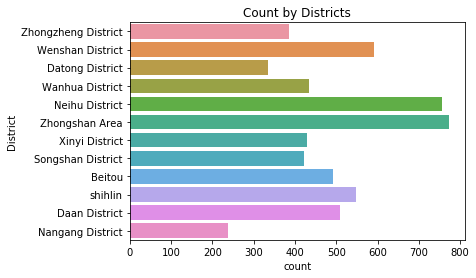

In [6]:
# Use Seaborn to plot the transaction record frequencies of each district. Set the title and label.
fig1=sns.countplot(y='district',data=new_taipei_df).set_title('Count by Districts')
plt.ylabel('District')
plt.show()

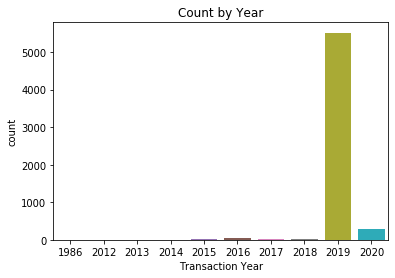

In [7]:
# Use Seaborn to plot the transaction record frequencies of each recorded year. Set the title and label.
sns.countplot(x='transaction_year',data=new_taipei_df).set_title('Count by Year')
plt.xlabel('Transaction Year')
plt.show()

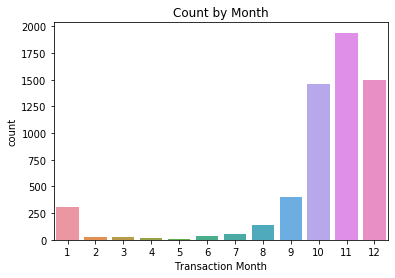

In [8]:
# Use Seaborn to plot the transaction record frequencies of each month. Set the title and label.
sns.countplot(x='transaction_month',data=new_taipei_df).set_title('Count by Month')
plt.xlabel('Transaction Month')
plt.show()

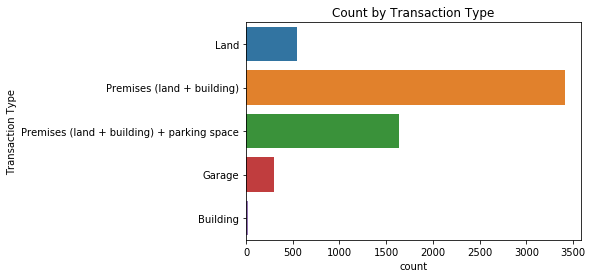

In [9]:
# Use Seaborn to plot the transaction record frequencies of each month.Set the title and label.
sns.countplot(y='transaction_type',data=new_taipei_df).set_title('Count by Transaction Type')
plt.ylabel('Transaction Type')
plt.show()

#### 1.2 Matplotlib Plotting

* Matplotlib will be used for showing the transaction record counted frequencies of each category. It presents the same information as 1.1. The district and transaction_type will be plotted horizontally.

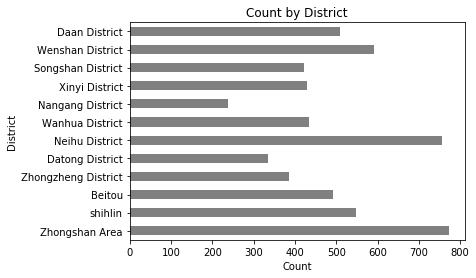

In [10]:
# Use pandas to convert the counted value of district to a dataframe.
dis=pd.DataFrame(new_taipei_df['district'].value_counts(sort=False))

# Use Matplotlib to plot the new dataframe. Set the title and labels.
dis.plot.barh(color='gray',legend=False)
plt.title('Count by District')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

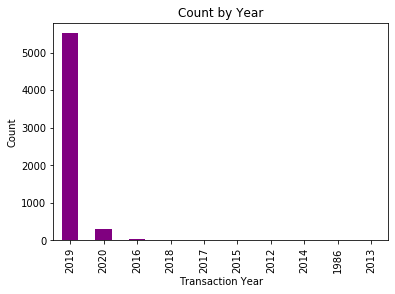

In [11]:
# Use pandas to convert the counted value of transaction year to a dataframe.
year=pd.DataFrame(new_taipei_df['transaction_year'].value_counts(ascending=False))

# Use Matplotlib to plot the new dataframe. Set the title and labels.
year.plot.bar(color='purple',legend=False)
plt.title('Count by Year')
plt.xlabel('Transaction Year')
plt.ylabel('Count')
plt.show()

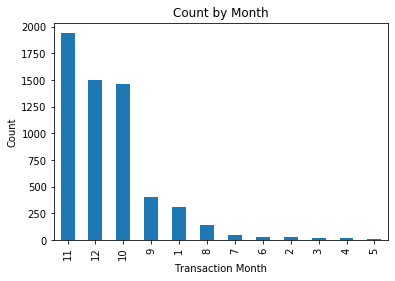

In [12]:
# Use pandas to convert the counted value of transaction month to a dataframe.
mon=pd.DataFrame(new_taipei_df['transaction_month'].value_counts(ascending=False))

# Use Matplotlib to plot the new dataframe. Set the title and labels.
mon.plot.bar(legend=False)
plt.title('Count by Month')
plt.xlabel('Transaction Month')
plt.ylabel('Count')
plt.show()

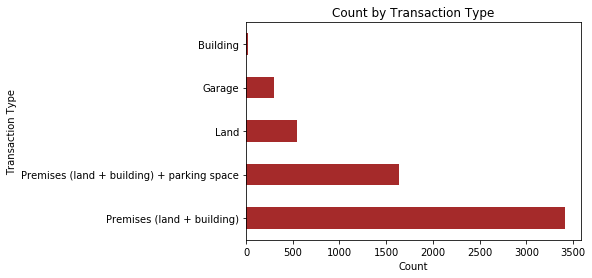

In [13]:
# Use pandas to convert the counted value of district to a dataframe.
typ=pd.DataFrame(new_taipei_df['transaction_type'].value_counts())

# Use Matplotlib to plot the new dataframe. Set the title and labels.
typ.plot.barh(color='brown',legend=False)
plt.title('Count by Transaction Type')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()

According to the district plot, 12 districts were observed in the dataset. Zhongshan area had the most transaction frequencies till 2020, following by Neihu district, which were also over 700 transactions. While Nangang had the least transactions, which was lower than 300. The dataset contains real estate transaction information of 10 different years, including the consecutive years from 2012 to 2020, and 1986 separately. The year 2019 has the most real estate transaction records. November, December, and October were the top 3 months with more than 1250 real estate transactions each. May had the least transaction records. As to the real estates’ type, premised (land + building) is the most common type among all the transactions, while buildings were the least popular.

### 2. Numeric Data EDA

The last two selected columns, building_shift_total_area and unit_ntd, are numeric data. General distribution will be examined below. As the different real estates’ types may reflect the unit prices, the unit prices may vary a lot. To check if there are outliers, box plots will be applied in the following EDA. Each plot will be generated in two methods, Seaborn and Matplotlib.

#### 2.1 Seaborn Plotting

* Use Seaborn to create 2 box plots of the building shift total area and unit price.

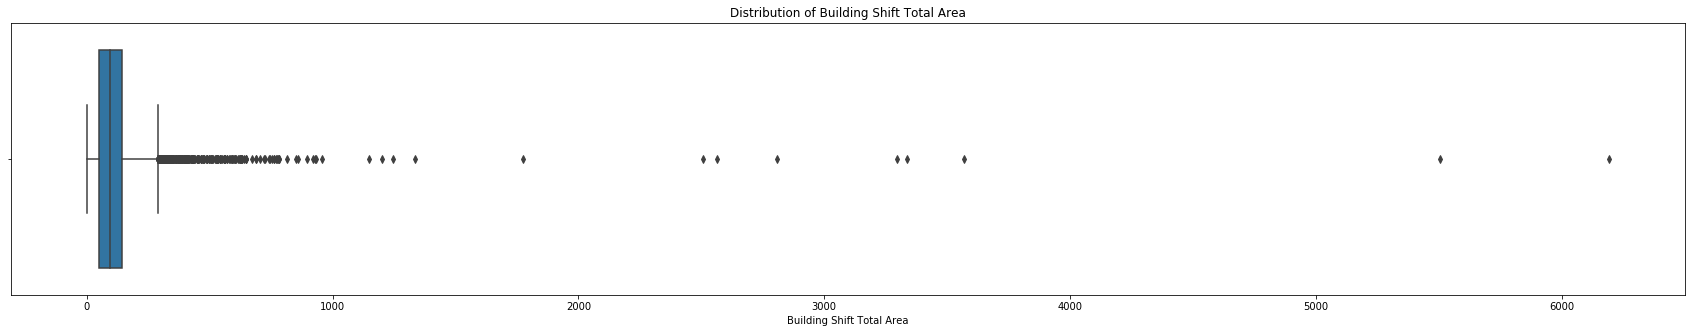

In [14]:
# After testing plot, adjust the figure size to fit the plot
plt.figure(figsize=(30, 5))

# Use Seaborn to create box plot for building shift total area, add title and labels.
sns.boxplot(x='building_shift_total_area',data=new_taipei_df)
plt.xlabel('Building Shift Total Area')
plt.title('Distribution of Building Shift Total Area')
plt.show()

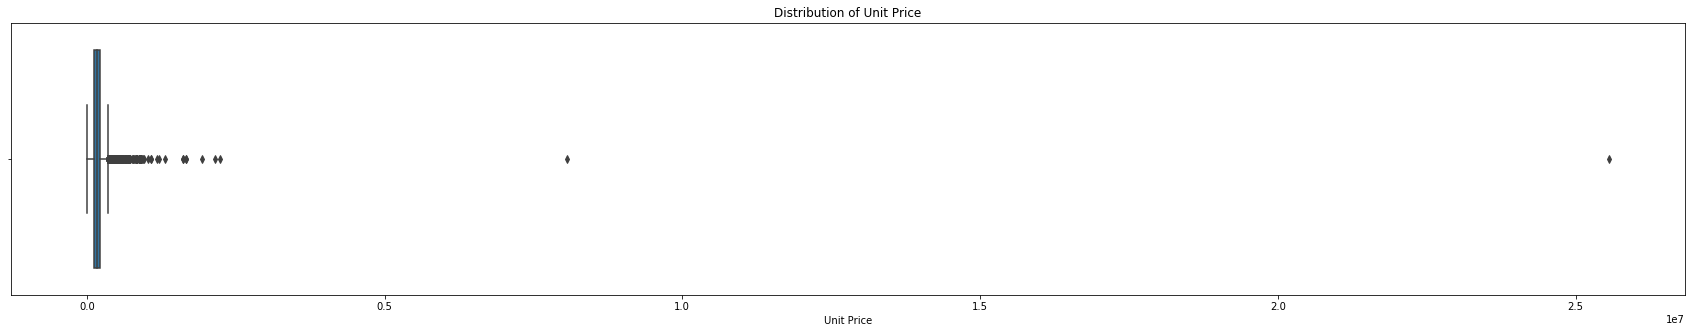

In [15]:
# After testing plot, adjust the figure size to fit the plot
plt.figure(figsize=(30, 5))

# Use Seaborn to create box plot for building shift total area, add title and labels.
sns.boxplot(x='unit_ntd',data=new_taipei_df)
plt.xlabel('Unit Price')
plt.title('Distribution of Unit Price')
plt.show()

#### 2.2 Matplotlib Plotting

* Use Matplotlib to create 2 box plots of the same building shift total area and unit price columns. It presents the same information as 2.1.

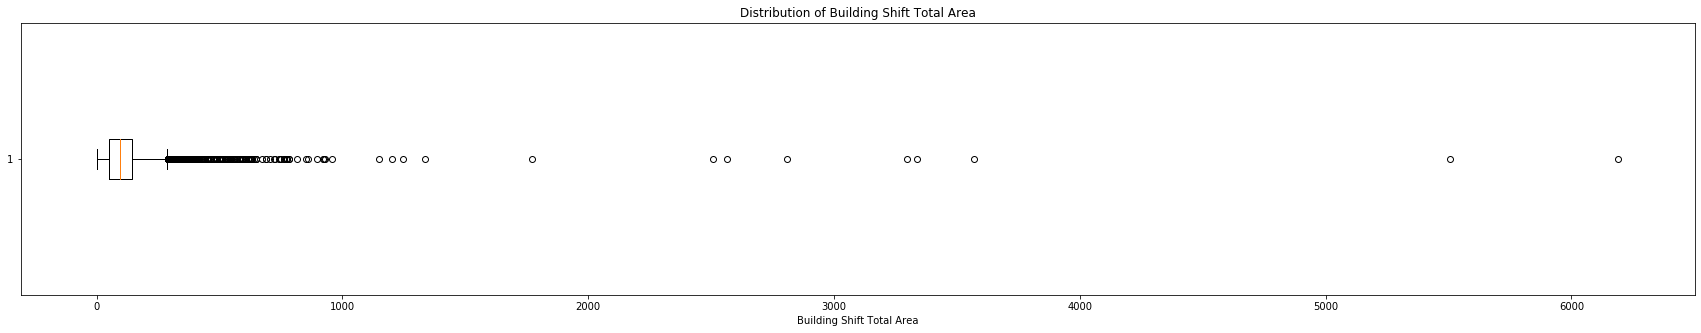

In [16]:
# Set a figure size for showing plot clearer
plt.figure(figsize=(30,5))

# Use pandas to extract the building_shift_total_area column values and plot the distribution
plt.boxplot(new_taipei_df['building_shift_total_area'],vert=False)
plt.xlabel('Building Shift Total Area')
plt.title('Distribution of Building Shift Total Area')
plt.show()

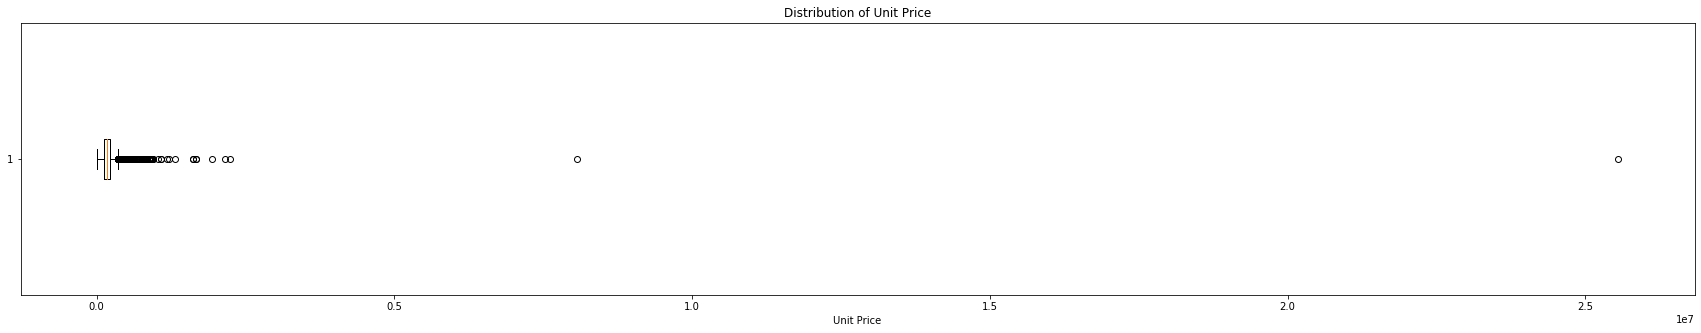

In [17]:
# Set a figure size for showing plot clearer
plt.figure(figsize=(30,5))

# Use pandas to extract the unit_ntd column values and plot the distribution
plt.boxplot(new_taipei_df['unit_ntd'],vert=False)
plt.xlabel('Unit Price')
plt.title('Distribution of Unit Price')
plt.show()

As shown in the 2 pairs of plots, generally, the building shift total area were below 500 square meters. The unit prices were mostly less than 2,000,000 NTD. Due to the extraordinary outliers on the plots, it is not easy to read the medium values of the attributes. The general information could be estimated only. To check what the outliers are, further testing will be tried as below.

* Apply max() function to reach the extreme outlier and investigate the observation.

In [18]:
#check the maximum value of unit_ntd column
outlier_a=max(new_taipei_df['unit_ntd'])

# reach the specific row
new_taipei_df[new_taipei_df['unit_ntd']==outlier_a]

,district,transaction_year,transaction_month,transaction_type,building_shift_total_area,unit_ntd
2305,Zhongshan Area,2019,10,Garage,0.09,2.555556e+07


In [19]:
#check the maximum value of building_shift_total_area column
outlier_b=max(new_taipei_df['building_shift_total_area'])

# reach the specific row
new_taipei_df[new_taipei_df['building_shift_total_area']==outlier_b]

,district,transaction_year,transaction_month,transaction_type,building_shift_total_area,unit_ntd
2935,Neihu District,2019,11,Premises (land + building) + parking space,6191.16,103373.196622


The outliers had extreme large or tiny building shift total area value. It might be caused by recording mistake or special cases. For universality, the extreme values will be dropped in the following inference.

## IV. Inference

To get a better research dataframe, the new_taipei_df needs to be filtered more to reach the final question answer. 
* The question required the year of 2019, transaction type with Premises (land + building) or Premises (land + building) + parking space. For extracting the outliers, two artificial boundaries are set based on the box plots in III.2.1 to ensure the records to be concentrated.

In [20]:
# filter out new dataframe for the research with 4 conditions, name it inference_df. 
inference_df=new_taipei_df[(new_taipei_df['transaction_year']==2019) &
                          (new_taipei_df['building_shift_total_area']<=500) &
                          (new_taipei_df['building_shift_total_area']<=2000000) & 
                          ((new_taipei_df['transaction_type']=='Premises (land + building)')|
                          (new_taipei_df['transaction_type']=='Premises (land + building) + parking space'))].reset_index()

# test if inference_df is available
inference_df.head()

,index,district,transaction_year,transaction_month,transaction_type,building_shift_total_area,unit_ntd
0,1,Wenshan District,2019,10,Premises (land + building),109.36,108357.717630
1,2,Wenshan District,2019,10,Premises (land + building),109.42,91390.970572
2,3,Wenshan District,2019,4,Premises (land + building) + parking space,163.53,128416.804256
3,4,Wenshan District,2019,10,Premises (land + building),204.79,328157.624884
4,5,Zhongzheng District,2019,9,Premises (land + building),88.70,205749.718151


The average unit price is simply the average of unit_ntd. It is supposed to be calculated based on the sum of product of building shift total area and unit price of each observation, then divided by the total area. Therefore. a total price of each observation needs to be added to the dataframe.

* Artificially create a column 'total_price' and assign the value of building_shift_total_area`*`unit_ntd to the new column.

In [21]:
#new=inference_df['building_shift_total_area']*inference_df['unit_ntd']
inference_df['total_price']=inference_df['building_shift_total_area']*inference_df['unit_ntd']


# test new dataframe
inference_df.head()

,index,district,transaction_year,transaction_month,transaction_type,building_shift_total_area,unit_ntd,total_price
0,1,Wenshan District,2019,10,Premises (land + building),109.36,108357.717630,11850000.0
1,2,Wenshan District,2019,10,Premises (land + building),109.42,91390.970572,10000000.0
2,3,Wenshan District,2019,4,Premises (land + building) + parking space,163.53,128416.804256,21000000.0
3,4,Wenshan District,2019,10,Premises (land + building),204.79,328157.624884,67203400.0
4,5,Zhongzheng District,2019,9,Premises (land + building),88.70,205749.718151,18250000.0


* Group the inference_df dataframe by district, and sum the value of each district. Convert the sum result as a dataframe for further average unit price calculation and plotting.

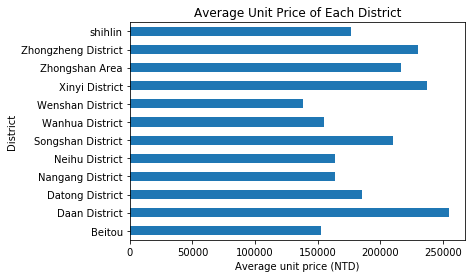

In [22]:
# get the sum result of inference_df group by district, convert it to sum_result dataframe
sum_result=pd.DataFrame(inference_df.groupby(['district']).sum())

# Using sum_result to calculate the average unit price of each district. Converting result to avg_df ready for plotting
avg_df=pd.DataFrame(sum_result['total_price']/sum_result['building_shift_total_area']).reset_index()

# Change column names for clarification
avg_df.columns = ['District','Average unit price']

# Use matplotlib to show the result
avg_df.plot.barh(x='District',legend=False)
plt.xlabel('Average unit price (NTD)')
plt.title('Average Unit Price of Each District')
plt.show()

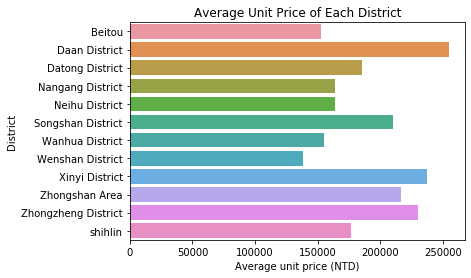

In [23]:
# Use Seaborn to show the result
sns.barplot(x='Average unit price',y='District',data=avg_df).set_title('Average Unit Price of Each District')
plt.xlabel('Average unit price (NTD)')
plt.show()

As shown in the plot, Daan district had the highest average unit price, which is reaching 250,000 NTD per square meter.
Take a closer look at Daan district, which month has the hight average unit price according to the record?

* Pick out observations for Daan district in inference_df and sum the total price by transaction_month and calculate the average. Convert the result as dataframe for plotting.

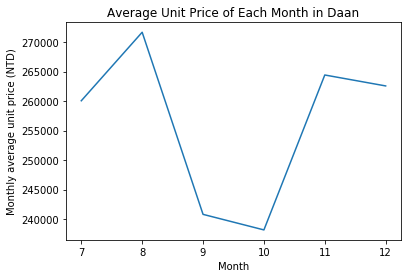

In [24]:
# pick out observation of Daan district and sum the total price by month.  
daan_df=pd.DataFrame(inference_df[inference_df['district']=='Daan District'].groupby(['transaction_month']).sum())

# convert the average unit price of each month to a dataframe mon_avg_df
mon_avg_df=pd.DataFrame(daan_df['total_price']/daan_df['building_shift_total_area']).reset_index()

# Change column names for clarification
mon_avg_df.columns = ['Month','Monthly average unit price']

# Use matplotlib to show the result
mon_avg_df.plot(x='Month',y='Monthly average unit price',legend=False)
plt.ylabel('Monthly average unit price (NTD)')
plt.title('Average Unit Price of Each Month in Daan')
plt.show()

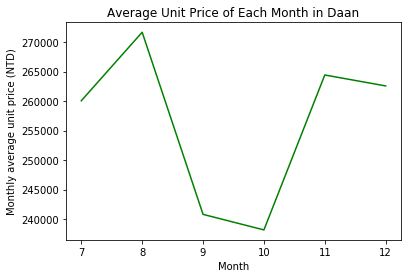

In [25]:
# Use Seaborn to show the result
sns.lineplot(x='Month',y='Monthly average unit price',data=mon_avg_df, color='green').set_title('Average Unit Price of Each Month in Daan')
plt.ylabel('Monthly average unit price (NTD)')
plt.show()

As the line chart showed the trend of the average unit price of Daan district, the average unit prices were high in July and August, reaching 270,000 NTD per square meter. After August, the average unit price dropped around 30,000 NTD per square meter till October in 2019. The average unit price raised 26,000 NTD and reached around 260,000 NTD again in December, 2019.

## V. Conclusion

According to the former news, Daan district had been having the top 1 expensive real estate price in Taipei for years. In 2019, the situation was still the same. In this research, Daan district, Xinyi district, and Zhongzheng district had high average unit prices, over 22,500 NTD per square meter. These districts are located in the downtown area of Taipei with rich education, finance and public health resources. While Wanhua district, Beitou, and Wenshan district had relatively low prices, which were just reaching or less than 15,000 NTD. These districts are suburb areas. 

The monthly average prices varied according to the research of Daan district. The difference could be over 35,000 NTD per square meter. Therefore, the real estate’s location and trading time are important to home seekers. For residents of Taipei, fall might be the right time to bargain a good price if considering downtown Taipei.

## References

1. https://www.kaggle.com/chrischien17/taiwan-taipei-city-real-estate-transaction-records

2. https://plvr.land.moi.gov.tw/DownloadOpenData

3. https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib

4. https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe

5. http://fang.qutaiwan.com/taibei/2014/25.html